# Preliminary Analysis - Zoe

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [169]:
# file paths
cur_dir = 'drive/My Drive/Colab Notebooks/2 Fall 2020/CMPE 255/Project/'
path_train = cur_dir + 'sts-train.csv'
path_test = cur_dir + 'sts-test.csv'

## Load and clean the data

Load data

In [170]:
train_file = open(path_train, 'r')
temp_train = []
for line in train_file:
    line_split = line.split('\t')
    temp_train.append(x for x in line_split)

test_file = open(path_test, 'r')
temp_test = []
for line in test_file:
    line_split = line.split('\t')
    temp_test.append(x for x in line_split)

len_train = len(temp_train)
len_test = len(temp_test)
total_len = len_train + len_test

print('training data length:', len_train)
print('testing data length:', len_test)
print('train/test ratio:', round(len_train/total_len, 2), round(len_test/total_len, 2))

training data length: 5749
testing data length: 1379
train/test ratio: 0.81 0.19


In [171]:
pd.set_option('display.max_colwidth', None)
col_names = ['c1', 'c2', 'c3', 'c4', 'similarity', 'sentence1', 'sentence2', 'c8', 'c9']
train_df = pd.DataFrame(temp_train, columns=col_names)
train_df

,c1,c2,c3,c4,similarity,sentence1,sentence2,c8,c9
0,main-captions,MSRvid,2012test,0001,5.000,A plane is taking off.,An air plane is taking off.\n,None,None
1,main-captions,MSRvid,2012test,0004,3.800,A man is playing a large flute.,A man is playing a flute.\n,None,None
2,main-captions,MSRvid,2012test,0005,3.800,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncooked pizza.\n,None,None
3,main-captions,MSRvid,2012test,0006,2.600,Three men are playing chess.,Two men are playing chess.\n,None,None
4,main-captions,MSRvid,2012test,0009,4.250,A man is playing the cello.,A man seated is playing the cello.\n,None,None
...,...,...,...,...,...,...,...,...,...
5744,main-news,headlines,2016,1456,0,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
5745,main-news,headlines,2016,1465,0,Dozens of Egyptians hostages taken by Libyan terrorists as revenge for airstrikes,Egyptian boat crash death toll rises as more bodies found in Nile,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
5746,main-news,headlines,2016,1466,0,President heading to Bahrain,President Xi: China to continue help to fight Ebola,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
5747,main-news,headlines,2016,1470,0,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n


In [172]:
test_df = pd.DataFrame(temp_test, columns=col_names)
test_df

,c1,c2,c3,c4,similarity,sentence1,sentence2,c8,c9
0,main-captions,MSRvid,2012test,0024,2.500,A girl is styling her hair.,A girl is brushing her hair.\n,None,None
1,main-captions,MSRvid,2012test,0033,3.600,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.\n,None,None
2,main-captions,MSRvid,2012test,0045,5.000,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.\n,None,None
3,main-captions,MSRvid,2012test,0063,4.200,A man is cutting up a cucumber.,A man is slicing a cucumber.\n,None,None
4,main-captions,MSRvid,2012test,0066,1.500,A man is playing a harp.,A man is playing a keyboard.\n,None,None
...,...,...,...,...,...,...,...,...,...
1374,main-news,headlines,2016,1354,0,"Philippines, Canada pledge to further boost relations",Philippines saves 100 after ferry sinks,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
1375,main-news,headlines,2016,1360,1,Israel bars Palestinians from Jerusalem's Old City,"Two-state solution between Palestinians, Israel pie in sky",Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
1376,main-news,headlines,2016,1368,1,How much do you know about Secret Service?,Lawmakers from both sides express outrage at Secret Service,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n
1377,main-news,headlines,2016,1420,0,Obama Struggles to Soothe Saudi Fears As Iran Talks Resume,Myanmar Struggles to Finalize Voter Lists for Sunday Polls,Europe Media Monitor (http://emm.newsbrief.eu),Europe Media Monitor (http://emm.newsbrief.eu)\n


Clean data

In [173]:
drop_cols = ['c1', 'c2', 'c3', 'c4', 'c8', 'c9']
train_df.drop(columns=drop_cols, inplace=True)
train_df['sentence2'].replace('\n', ' ', regex=True, inplace=True)
train_df

,similarity,sentence1,sentence2
0,5.000,A plane is taking off.,An air plane is taking off.
1,3.800,A man is playing a large flute.,A man is playing a flute.
2,3.800,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncooked pizza.
3,2.600,Three men are playing chess.,Two men are playing chess.
4,4.250,A man is playing the cello.,A man seated is playing the cello.
...,...,...,...
5744,0,Severe Gales As Storm Clodagh Hits Britain,Merkel pledges NATO solidarity with Latvia
5745,0,Dozens of Egyptians hostages taken by Libyan terrorists as revenge for airstrikes,Egyptian boat crash death toll rises as more bodies found in Nile
5746,0,President heading to Bahrain,President Xi: China to continue help to fight Ebola
5747,0,"China, India vow to further bilateral ties",China Scrambles to Reassure Jittery Stock Traders


In [174]:
test_df.drop(columns=drop_cols, inplace=True)
test_df['sentence2'].replace('\n', ' ', regex=True, inplace=True)
test_df

,similarity,sentence1,sentence2
0,2.500,A girl is styling her hair.,A girl is brushing her hair.
1,3.600,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.
2,5.000,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.
3,4.200,A man is cutting up a cucumber.,A man is slicing a cucumber.
4,1.500,A man is playing a harp.,A man is playing a keyboard.
...,...,...,...
1374,0,"Philippines, Canada pledge to further boost relations",Philippines saves 100 after ferry sinks
1375,1,Israel bars Palestinians from Jerusalem's Old City,"Two-state solution between Palestinians, Israel pie in sky"
1376,1,How much do you know about Secret Service?,Lawmakers from both sides express outrage at Secret Service
1377,0,Obama Struggles to Soothe Saudi Fears As Iran Talks Resume,Myanmar Struggles to Finalize Voter Lists for Sunday Polls


## Analyze the data

Check for null values

In [175]:
print("Check for null values in train data")
print(train_df.isnull().sum())

print("\nCheck for null values in test data")
print(test_df.isnull().sum())

Check for null values in train data
similarity    0
sentence1     0
sentence2     0
dtype: int64

Check for null values in test data
similarity    0
sentence1     0
sentence2     0
dtype: int64


Display statistics

In [176]:
train_df.describe()

,similarity,sentence1,sentence2
count,5749,5749,5749
unique,205,5436,5426
top,4,A man is playing a guitar.,A man is playing a guitar.
freq,185,16,23


In [177]:
test_df.describe()

,similarity,sentence1,sentence2
count,1379,1379,1379
unique,151,1256,1337
top,4,"You just have to base your answer on what you do know, which is what you want.",A man is playing a guitar.
freq,68,9,4


### Analyze the sentences

Find the 10 most common sentences

In [178]:
print("10 most common sentences in train data")
common_train1 = train_df['sentence1'].value_counts().head(10)
print(common_train1)
print()
common_train2 = train_df['sentence2'].value_counts().head(10)
print(common_train2)

print("\n10 most common sentences in test data")
common_test1 = test_df['sentence1'].value_counts().head(10)
print(common_test1)
print()

common_test2 = test_df['sentence2'].value_counts().head(10)
print(common_test2)

10 most common sentences in train data
A man is playing a guitar.                      16
A woman is slicing an onion.                     8
A woman is peeling a potato.                     7
A man is playing guitar.                         7
A man is playing the guitar.                     7
A woman is dancing.                              6
We are all vessels filled with many wonders.     6
A man is playing a flute.                        6
The man is playing the guitar.                   6
A woman is cutting an onion.                     5
Name: sentence1, dtype: int64

A man is playing a guitar.       23
A man is playing a flute.         8
A man is dancing.                 6
A man is driving a car.           6
A woman is dancing.               5
A man is riding a horse.          5
A man is playing the guitar.      5
A woman is riding a horse.        5
A man is talking.                 5
A train on the train tracks.      4
Name: sentence2, dtype: int64

10 most common sentences in t

Plot the 10 most common sentences

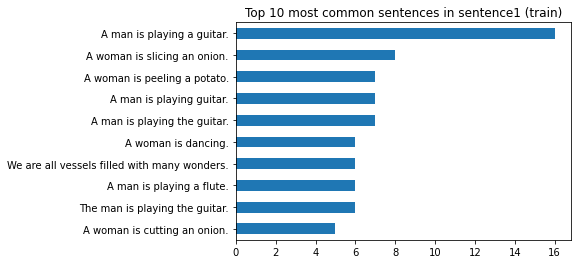

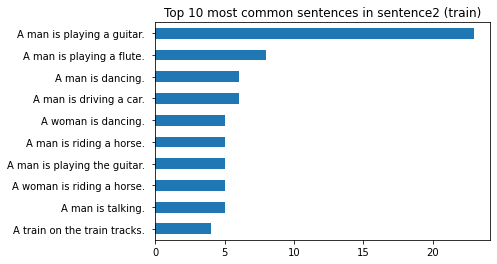

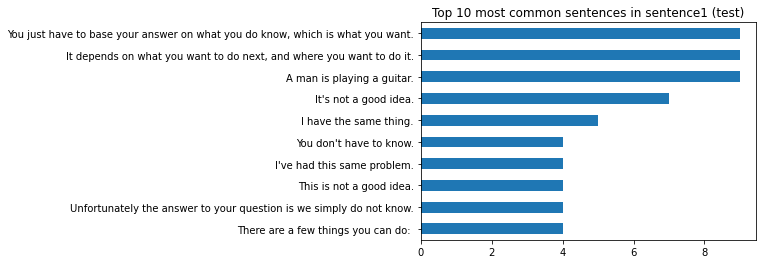

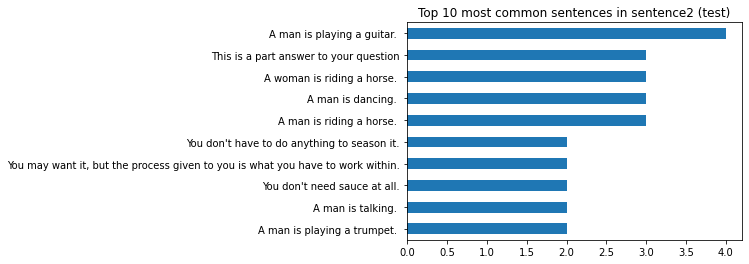

In [179]:
# reverse by row so most frequent sentences are graphed first
c_train1 = common_train1.reindex(index=common_train1.index[::-1])
c_train2 = common_train2.reindex(index=common_train2.index[::-1])
c_test1 = common_test1.reindex(index=common_test1.index[::-1])
c_test2 = common_test2.reindex(index=common_test2.index[::-1])

c_train1.plot(kind='barh', title='Top 10 most common sentences in sentence1 (train)')
plt.show()
c_train2.plot(kind='barh', title='Top 10 most common sentences in sentence2 (train)')
plt.show()

c_test1.plot(kind='barh', title='Top 10 most common sentences in sentence1 (test)')
plt.show()
c_test2.plot(kind='barh', title='Top 10 most common sentences in sentence2 (test)')
plt.show()

### Analyze the similarity scores

In [180]:
print("Display statistics for similarity scores in training dataset")
train_df['similarity'] = train_df['similarity'].astype(float)
print(train_df['similarity'].describe())

print("\nDisplay statistics for similarity scores in testing dataset")
test_df['similarity'] = test_df['similarity'].astype(float)
print(test_df['similarity'].describe())

Display statistics for similarity scores in training dataset
count    5749.000000
mean        2.700999
std         1.464398
min         0.000000
25%         1.500000
50%         3.000000
75%         3.800000
max         5.000000
Name: similarity, dtype: float64

Display statistics for similarity scores in testing dataset
count    1379.000000
mean        2.607917
std         1.525517
min         0.000000
25%         1.315000
50%         2.800000
75%         3.800000
max         5.000000
Name: similarity, dtype: float64


Sort the data by similarity score

In [181]:
sorted_train = train_df.sort_values(by='similarity', ascending=False)
sorted_train

,similarity,sentence1,sentence2
0,5.0,A plane is taking off.,An air plane is taking off.
1558,5.0,A black poodle plays in the snow.,A black poodle frolics in the snow.
973,5.0,The man is using a sledghammer to break the concrete block that is on the other man.,A man breaks a slab of concrete that is lying on a prone man with a sledge hammer.
5144,5.0,Bradley Manning-WikiLeaks case turns to sentencing,Manning WikiLeaks case turns to sentencing phase
5180,5.0,Gunmen Surround Libya's Foreign Ministry To Push Demands,Gunmen surround Libyan foreign ministry to push demands
...,...,...,...
1684,0.0,Man in red shorts and white shirt kicking a soccer ball.,A black dog stands in the surf holding a red rubber ball.
1663,0.0,A young boy in a white dress shirt is playing on a grassy plain.,A woman is getting her hair done at a salon.
5340,0.0,Egyptian military spokesman denounces incitement against army,Labor ministry announcement due on Monday
1652,0.0,A black dog is walking on the grass with a stick in it's mouth.,A boy holds a net with a snake in it close to the ground.


In [182]:
sorted_test = test_df.sort_values(by='similarity', ascending=False)
sorted_test

,similarity,sentence1,sentence2
497,5.0,A man steers a blue boat past brightly colored houses.,a man driving a blue boat passes by some colorful houses.
720,5.0,I think it's fine to ask this question.,I think it is okay to ask the question.
558,5.0,There is a cook preparing food.,A cook is making food.
845,5.0,It's pretty much up to you.,It is up to you.
844,5.0,There are two things to consider:,I think there are two important things to consider:
...,...,...,...
681,0.0,"You just have to base your answer on what you do know, which is what you want.",It is his job to see that you have what you need to do your job.
243,0.0,The girl is carrying a baby.,A man is eating a food.
100,0.0,A cat is walking around a house.,A woman is peeling potato.
868,0.0,You shouldn't feel any obligation at all.,You don't need sauce at all.


Display 10 of the most similar sentences

In [183]:
sorted_train.head(10)

,similarity,sentence1,sentence2
0,5.0,A plane is taking off.,An air plane is taking off.
1558,5.0,A black poodle plays in the snow.,A black poodle frolics in the snow.
973,5.0,The man is using a sledghammer to break the concrete block that is on the other man.,A man breaks a slab of concrete that is lying on a prone man with a sledge hammer.
5144,5.0,Bradley Manning-WikiLeaks case turns to sentencing,Manning WikiLeaks case turns to sentencing phase
5180,5.0,Gunmen Surround Libya's Foreign Ministry To Push Demands,Gunmen surround Libyan foreign ministry to push demands
5186,5.0,Rock bands' plane makes emergency landing in Ill.,Rock Bands' Plane Makes Emergency Landing in Ill.
5197,5.0,Anthony Weiner slips to fourth place in new poll,Weiner falls to fourth in new NYC mayoral poll
5200,5.0,US top diplomat Kerry's wife rushed to hospital,US Secretary of State John Kerry‚Äôs wife rushed to hospital
5213,5.0,Egypt votes on new constitution,Egyptians Voting on New Constitution
877,5.0,The person is removing the scales from the fish.,A person is descaling a fish.


In [184]:
sorted_test.head(10)

,similarity,sentence1,sentence2
497,5.0,A man steers a blue boat past brightly colored houses.,a man driving a blue boat passes by some colorful houses.
720,5.0,I think it's fine to ask this question.,I think it is okay to ask the question.
558,5.0,There is a cook preparing food.,A cook is making food.
845,5.0,It's pretty much up to you.,It is up to you.
844,5.0,There are two things to consider:,I think there are two important things to consider:
140,5.0,A man plays a guitar.,A man is playing a guitar.
139,5.0,A group of people are sweeping water out of a house.,People are sweeping water out of a house.
136,5.0,A woman plays the flute.,A woman is playing the flute.
710,5.0,I don't see why there should be any problem with this whatsoever.,I don't see why that should be a problem.
133,5.0,A woman is stabbing a potato with a fork.,A woman is puncturing a potato with a fork.


Display 10 of the least similar sentences

In [185]:
sorted_train.tail(10)

,similarity,sentence1,sentence2
1695,0.0,A man standing on a boat is pulling another boat close by with a bamboo stick.,a man in a black hat standing in front of a brick wall and a sign
1693,0.0,Two people are racing a sidecar motorcycle in the mud.,The dog carrying a long stick in its mouth.
1692,0.0,A grey hound is active in a grassy field.,A bunch of bikes racing on a track.
714,0.0,A man is being put into an abulance.,A man is pouring pasta onto a plate.
1689,0.0,The large brown dog is jumping through the tall grass.,The girl wearing a blue shirt is running through a science center.
1684,0.0,Man in red shorts and white shirt kicking a soccer ball.,A black dog stands in the surf holding a red rubber ball.
1663,0.0,A young boy in a white dress shirt is playing on a grassy plain.,A woman is getting her hair done at a salon.
5340,0.0,Egyptian military spokesman denounces incitement against army,Labor ministry announcement due on Monday
1652,0.0,A black dog is walking on the grass with a stick in it's mouth.,A boy holds a net with a snake in it close to the ground.
5748,0.0,Putin spokesman: Doping charges appear unfounded,The Latest on Severe Weather: 1 Dead in Texas After Tornado


In [186]:
sorted_test.tail(10)

,similarity,sentence1,sentence2
675,0.0,There is no maximum.,There is no quarantine period.
242,0.0,A man is doing exercise.,A baby is laughing.
867,0.0,"Yes, you should make a résumé.","Yes, you should talk to your professor."
106,0.0,A man is playing guitar.,A boy is talking to a giant dog.
377,0.0,A small camouflaged airplane parked in the grass.,A small dog wearing a pink shirt tied to a railing.
681,0.0,"You just have to base your answer on what you do know, which is what you want.",It is his job to see that you have what you need to do your job.
243,0.0,The girl is carrying a baby.,A man is eating a food.
100,0.0,A cat is walking around a house.,A woman is peeling potato.
868,0.0,You shouldn't feel any obligation at all.,You don't need sauce at all.
1378,0.0,South Korea declares end to MERS outbreak,North Korea Delegation Meets With South Korean Officials


Display sentences with similarity score of 1

In [187]:
train_sim1 = train_df[train_df.similarity == 1]
train_sim1

,similarity,sentence1,sentence2
45,1.0,A man is playing the piano.,A woman is playing the violin.
46,1.0,A woman is playing the flute.,A man is playing the guitar.
117,1.0,A man is running on the road.,A car is driving down the road.
118,1.0,A man is riding on a horse.,A man is talking on a phone.
129,1.0,A woman is picking a can.,A woman is slicing a tomato.
...,...,...,...
5720,1.0,South Korea regrets North's refusal of talks,"South Korea reports 14th Mers death, 12 new cases"
5725,1.0,South Korea reports seven new MERS cases,South Korean woman in contact with MERS patient dies
5727,1.0,"U.S. military says it conducts airstrikes against IS in Syria, Iraq",Observatory says Russian air strikes kill 45 in Syria
5732,1.0,UK Leader Signals Support for Airstrikes on IS in Syria,Why Cyprus backs Cameron's push for UK air strikes in Syria


In [188]:
sorted_train[sorted_train.similarity == 1]

,similarity,sentence1,sentence2
631,1.0,A man is running.,A man is mooing.
1773,1.0,A man with long hair is looking through a camera.,A woman stands against a wall near a video camera.
5225,1.0,Google releases Nexus 5 phone with Kit Kat,Google redesigns search results on PCs
4265,1.0,Obama's poll rating drops in boost for Republican rivals,Obama's big Hispanic win worries Republicans
4122,1.0,Attack on Nato base in Afghanistan kills 15,Aid workers freed in Afghanistan raid
...,...,...,...
3689,1.0,chinese authorities were not immediately available for comment.,godzhayev and godzhayev's lawyers were not immediately available to comment.
4103,1.0,Palestinian leadership condemn Israeli FM call to oust Abbas,Palestinian leadership backs Fatah-Hamas Doha deal
1919,1.0,A child in a red shirt is using a black wake board to splash over a beach wave.,A man in a rowboat is rowing across blue water.
4058,1.0,Beef burger mix recalled over salmonella concerns,Choc powder recalled over salmonella concerns


Display sentences with similarity score of 2

In [189]:
train_sim2 = train_df[train_df.similarity == 2]
train_sim2.iloc[105:110]

,similarity,sentence1,sentence2
3483,2.0,south korea launches new bullet train reaching 300 kph.,south korea has had a bullet train system since the 1980s.
3489,2.0,no other drug has become as integral in decades.,the drug has been around in other forms for years.
3528,2.0,cambodia and vietnam finalized an agreement to stop asian and european drug traffickers.,syrian and russian officials signed an agreement of cooperation in combating drug trafficking.
3576,2.0,indian nationals constitute the largest number of foreign inmates in nepal prisons.,drug traffickers from foreign countries constitute the largest percentage of foreign inmates in nepal.
3624,2.0,the lawyer of michael karras named s.s. dhillon could not be reached for comment.,durban port authorities and police explosives inspectors could not be reached for comment.


In [190]:
sorted_train[sorted_train.similarity == 2]

,similarity,sentence1,sentence2
2292,2.0,Jury nullification means a law isn't Constitutional?,No. Jury nullification does not mean that a law is unconstuitutional.
3165,2.0,Rusch has also allowed five or more earned runs in each of his last three starts.,Redman has allowed two earned runs or less in six of his nine starts.
5742,2.0,"France shuts mosque, arrests man in crackdown after attacks",Security tightened at New Delhi churches after attacks
5646,2.0,Russia's Putin claims authority to invade Ukraine,Kremlin: Putin yet to decide on using Russian troops in Ukraine
3173,2.0,"The technology-packed Nasdaq Composite Index <.IXIC> dropped 37.78 points, or 1.94 percent, to 1,912.36.","The Nasdaq composite index fell 2.95, or 0.2 percent, for the week to 1,912.36 after stumbling 37.78 yesterday."
...,...,...,...
4275,2.0,Chinese stocks fall after RRR cut - May 14,Chinese stocks gain at midday Monday
4426,2.0,Fight for Mali Town Reflects Islamist Tactics,EU to train Mali army to fight northern Islamist militants
4422,2.0,"Police kill gunman, find 3 more dead in Colo. home",4 dead after police standoff with gunman barricaded in US home
3007,2.0,There are 103 Democrats in the Assembly and 47 Republicans.,Democrats dominate the Assembly while Republicans control the Senate.


Display sentences with similarity score of 3

In [191]:
train_sim3 = train_df[train_df.similarity == 3]
train_sim3

,similarity,sentence1,sentence2
23,3.0,A woman is eating something.,A woman is eating meat.
32,3.0,A woman is dancing and singing with other women.,A woman is dancing and singing in the rain.
80,3.0,A boy is singing and playing the piano.,A boy is playing the piano.
140,3.0,someone is slicing a vegetable.,Someone is slicing a tomato.
147,3.0,A man is walking slowly across a rope bridge.,A boy is walking across a bridge.
...,...,...,...
5672,3.0,Sierra Leone in Ebola lockdown,Sierra Leone Reaches Final Day of Ebola Lockdown
5675,3.0,"More than 3,400 migrants rescued at sea in Mediterranean","Over 2,000 migrants rescued from wooden boats in Mediterranean"
5690,3.0,Islamic State issues video of beheading of US hostage,Islamic State posts second propaganda video of UK hostage
5697,3.0,Greece bailout uncertainty weighs on global markets,Greece concerns drag on Asia markets


In [192]:
sorted_train[sorted_train.similarity == 3]

,similarity,sentence1,sentence2
2971,3.0,"The military said it had killed 12 rebels and captured nine in the campaign so far, for the loss of six soldiers wounded.","The military said it had killed 16 rebels and captured nine in the campaign so far, with one soldier killed and six wounded."
1373,3.0,A man in white with a wine bottle and a woman in a red turtleneck with a white vest.,A man and woman posing on a field with a bottle of wine.
3026,3.0,"After Freitas' opening statement, King County Superior Court Judge Charles Mertel recessed trial until after the Thanksgiving weekend.",King County Superior Court Judge Charles Mertel will then recess the trial until Monday.
3136,3.0,"During a screaming match in 1999, Carolyn told John she was still sleeping with Bergin.","She, in turn, occasionally told John that she was still sleeping with an ex-boyfriend, ""Baywatch"" hunk Michael Bergin."
5706,3.0,"Nepal earthquake death toll surpasses 7,000","Death toll in Nepal earthquake tops 8,000"
...,...,...,...
2283,3.0,Classical Gas We are all vessels filled with many wonders.,The theme song to Cheers: We are all vessels filled with many wonders.
2135,3.0,It's so stupid that it just has to be true.,It's amusing to think it even might be true.
2607,3.0,Activists say they fear the gathering is an attempt by corporate farming to push bio-engineered crops on starving countries.,"Instead, they fear the conference is an attempt by corporate farming and biotech interests to push into new markets."
4614,3.0,"Facing Bailout Tax, Cypriots Try to Get Cash Out of Banks",Bailout terms prompt run on Cyprus banks


Display sentences with similarity score of 4

In [193]:
train_sim4 = train_df[train_df.similarity == 4]
train_sim4

,similarity,sentence1,sentence2
29,4.0,A girl is flying a kite.,A girl running is flying a kite.
30,4.0,A man is riding a mechanical bull.,A man rode a mechanical bull.
40,4.0,A woman is frying fish.,A woman is cooking fish.
59,4.0,A man is eating a banana by a tree.,A man is eating a banana.
65,4.0,A squirrel is spinning around in circles.,A squirrel runs around in circles.
...,...,...,...
5664,4.0,China on high alert for typhoon Kalmaegi,China issues yellow alert for typhoon Kalmaegi
5668,4.0,Tokyo shares open higher over buoyant U.S. market,Tokyo shares open higher tracing U.S. gains
5673,4.0,Tokyo shares open higher on buoyant U.S. market,Tokyo shares open higher following strong U.S. performance
5676,4.0,Lewis Hamilton Takes Pole for Russian GP,Lewis Hamilton wins inaugural Russian GP


In [194]:
sorted_train[sorted_train.similarity == 4]

,similarity,sentence1,sentence2
3029,4.0,"Palm Wednesday announced plans to acquire Handspring, a company started by Jeff Hawkins, regarded by many as the father of the Palm handheld.","Palm said on Wednesday it plans to buy Handspring, a company created by renegade Palm co-founder Jeff Hawkins."
4905,4.0,Japanese planes flew into China's new defense zone,"Japan, S Korean military planes defy China's new defence zone"
1523,4.0,"A dog in a ""superman"" shirt sleeps on a blanket.",A brown dog in a Superman shirt is laying on a blue blanket.
2180,4.0,Tell us what the charges were.,Yes what are his charges.
3193,4.0,"When fully operational, the facility is expected to employ up to 1,000 people.","The plant would employ 1,000 people when fully built out, the company said."
...,...,...,...
4044,4.0,Aung San Suu Kyi to address British MPs,Burma's Aung San Suu Kyi to address parliament on June visit
1117,4.0,An Amtrak passenger train waiting at a station.,A passenger train waiting in a station.
3590,4.0,elbaradei stated that this is the last chance to build security in the middle east based on trust and cooperation and not on possession of nuclear weapons.,this is the last chance to build security in the middle east based on trust and cooperation rather than on the possession of nuclear arms.
3334,4.0,"""We believe that it is not necessary to have a divisive confirmation fight over a Supreme Court appointment,"" Daschle wrote.","""We believe that it is not necessary to have a divisive confirmation fight,"" Daschle of South Dakota wrote the Republican president."
